In [1]:
# execute this cell before you start
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras as keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2024-03-16 00:33:55.669724: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.1



## To open virtual environment

source tfvenv/bin/activate

#  CA2

to submit the assignment, please do the following:

- make sure that the notebook runs through and produces all desired output after `Kernel -> Restart & Run all`
- running through the whole notebook must not take no more than 60 minutes on a standard computer, similar to our lab-computers, without GPU and 8GB of RAM
- save the notebook (CA2.ipynb)
- upload the file `CA2.ipynb` to canvas.
- note that Google Colab ipynb files do not work with the nbgrader system I use to grade assignments and are therefore not allowed. 


# Q1 The CIFAR-10 dataset.

(10 marks)

Consider the data in  [`keras.datasets.cifar10`](https://www.tensorflow.org/datasets/catalog/cifar10) and train a network which reliably categorizes the data. 
Try to understand tradeoffs:

- What increases computing time?
- What increases accuracy?

This dataset has its own [Wikipedia page](https://en.wikipedia.org/wiki/CIFAR-10), and is often used as benchmark for new proposed methods. 
You can take the cat/dog example from the lecture as a starting point, but you can also find plenty of inspiration in the Internet.  As before, it is not forbidden to get such inspiration, but please stay in the framework of what is covered in the lecture and clearly cite from where you take what. 


To get you started, here some code to show with which you can browse the data:

In [2]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(train_data,train_labels),(test_data,test_labels) = keras.datasets.cifar10.load_data()


from ipywidgets import interact

@interact(k=(0, len(train_data)-1))
def myplot(k):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.set_title(labels[train_labels[k][0]])
    ax.imshow(train_data[k])


interactive(children=(IntSlider(value=24999, description='k', max=49999), Output()), _dom_classes=('widget-int…

print shape of training/test data and labels

In [3]:
print("Training images shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)


Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [4]:
max(train_labels)

array([9], dtype=uint8)

Plot to see the first few training images

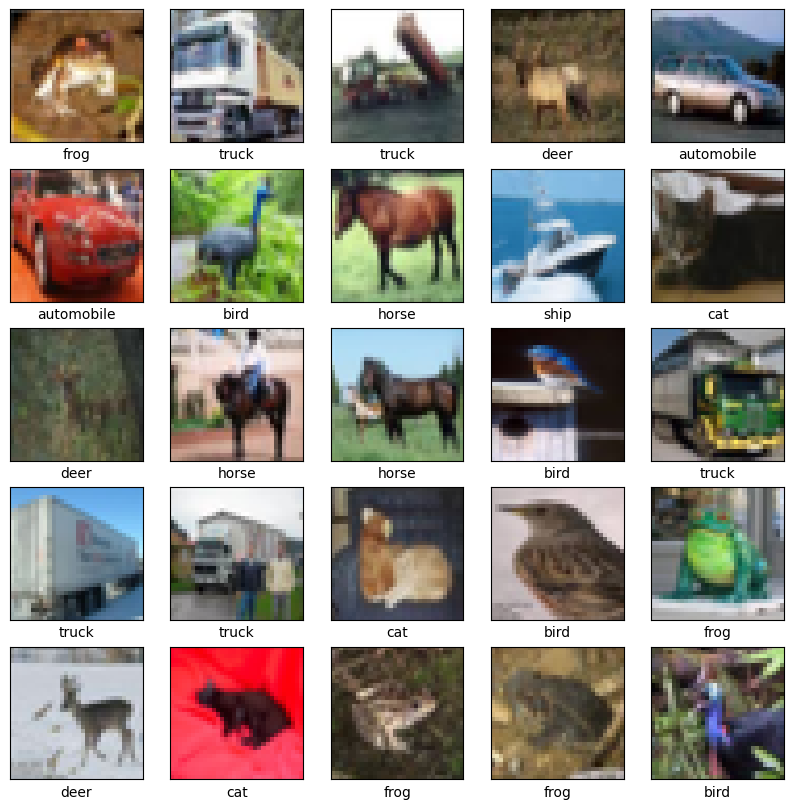

In [5]:
import matplotlib.pyplot as plt

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):  # Displaying the first 25 images
    plt.subplot(5, 5, i+1)  # 5x5 grid, position i+1
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    # Replace train_labels[i] with labels[train_labels[i][0]] to display the class name
    plt.xlabel(labels[train_labels[i][0]])
plt.show()


### 2. Preprocess the data
Normalizing image data, this is done to change the pixel values from 0-255 to a range between 0-1, this makes computations easier

In [6]:
# normalize image data
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

One hot encoding the labels, this is done for multi class classification problems such as CIFAR-10. this is used by many loss functions inlcluding categorical cross entropy suited for this data

In [7]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

Create training and validation datasets

In [8]:
batch_size = 32
train_ds = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((test_data, test_labels)).batch(batch_size)

### 3. Data augmentation


Data source train_ds is the cifar-10 training dataset in the form of a tf.data.Dataset

In [9]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float64, name=None))>

Code used to retreive labels of train data

In [10]:
tmp = train_ds.take(1)
list(tmp)[0][1]


2024-03-16 00:34:07.963859: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(32, 10), dtype=float64, numpy=
array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0.,

This defines the data augmentation steps

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)  # rotates by up to 36 degrees
])

Visualisation: after applying augmenation, the images are displayed to verify the augmentation effect.

Here the augmentation is applied to the first 9 images

2024-03-16 00:34:08.667649: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


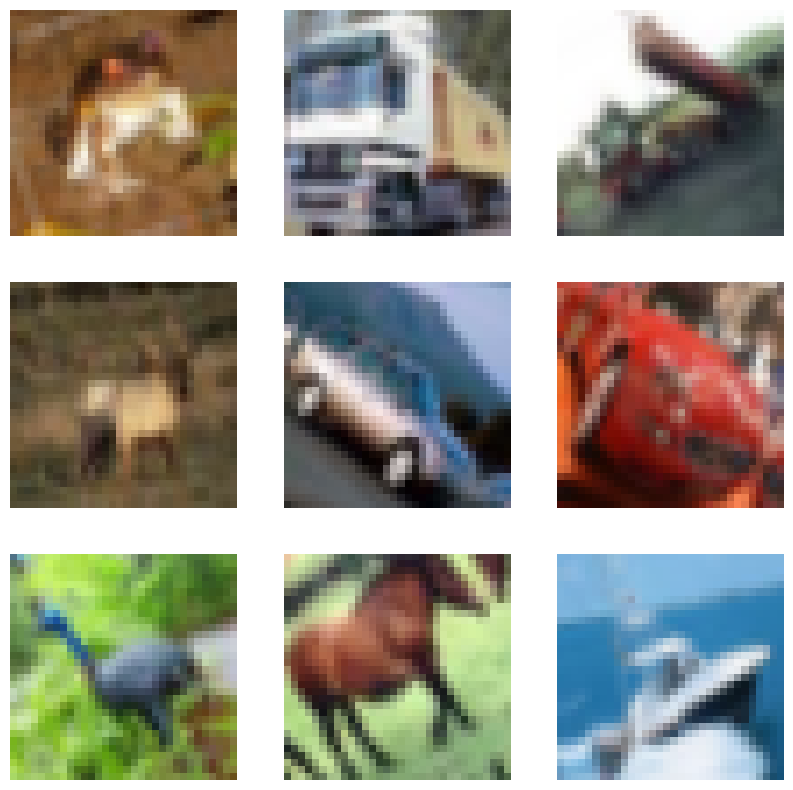

In [12]:
images, _ = list(train_ds.take(1))[0]

plt.figure(figsize=(10, 10))

# Displaying the first 9 augmented images
for i in range(9):
    augmented_image = data_augmentation(tf.expand_dims(images[i], 0))# augments the ith image 
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0].numpy())  
    plt.axis("off")

plt.show()


Here augmentation is appied to the first image 9 times

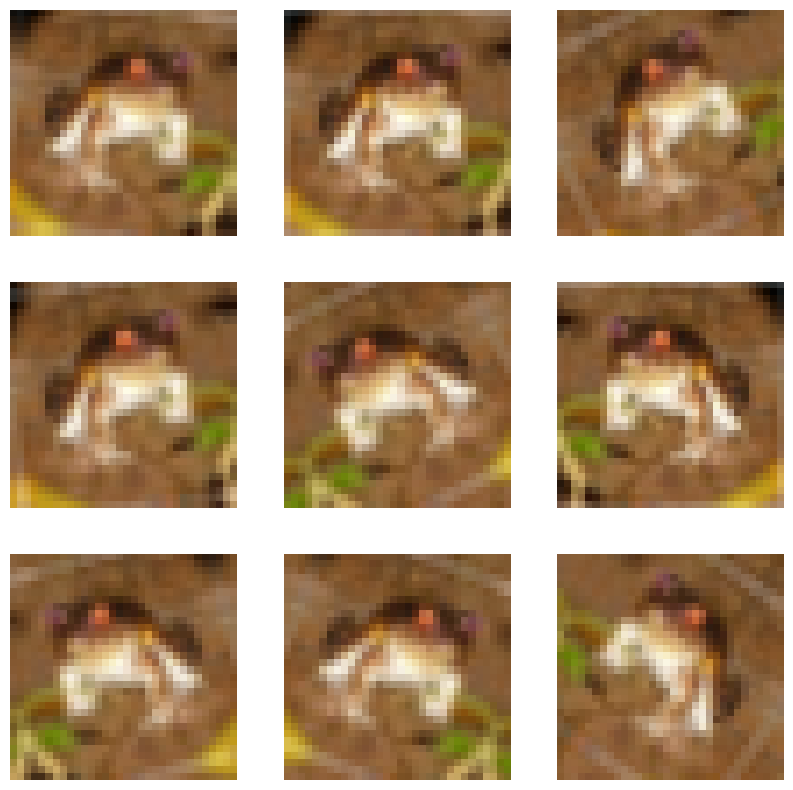

In [13]:
plt.figure(figsize=(10, 10))

# Apply data augmentation to the first image in the batch


# Displaying the first augmented image 9 times
for i in range(9):
    augmented_image = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    # Display the first augmented image
    plt.imshow(augmented_image[0].numpy())
    plt.axis("off")




Display the summary of the data augmentation model, showing the sequence of transormation that is applied to input images, contains **2 layers**.

**Random flip:** layer responsible for randomly flippiing images horizontaly 

**Random rotation:** layer responsible for randomly rotating them within a range of 0.1 / 36 degrees

**Output Shape:** for both layers is 1,32,32,3 where a single image is processed then  image size being 32x32 x 3 colour channels(RGB)

**Param**: there are 0 parameters since data augmentation doesnt involve learning

In [14]:
data_augmentation.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (1, 32, 32, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (1, 32, 32, 3)         │             0 │
│ (RandomRotation)                │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Gives the dimesnions of the images tensor 

In [15]:
images.shape

TensorShape([32, 32, 32, 3])

### 4. Building the model



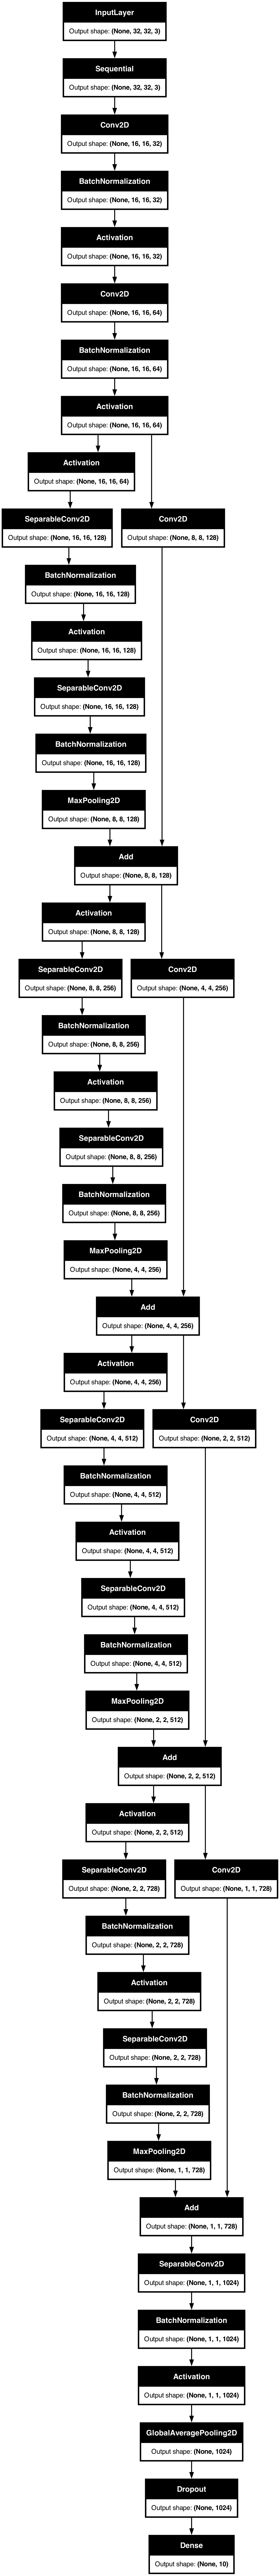

In [16]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)  # We keep the data augmentation here

    # Entry block
    # Removed the Rescaling layer since we already normalized our data outside of this model
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Adding a few convolutional blocks
    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(previous_block_activation)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Adding the final layer
    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    
    # Set the correct activation and number of units for CIFAR-10
    activation = "softmax"  # 'softmax' for multi-class classification
    units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

# Adjust `input_shape` for CIFAR-10 images and `num_classes` for 10 classes
model = make_model(input_shape=(32, 32, 3), num_classes=10)
  # Display the model architecture

# Optional: Plot the model (only if you have graphviz installed)
keras.utils.plot_model(model, show_shapes=True)


In [17]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 32, 32, 3) │          0 │ input_layer_1[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 16, 16,    │        896 │ sequential[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 16, 16,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 16, 16,    │     18,496 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 16, 16,    │          0 │ activation_1[0][… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d    │ (None, 16, 16,    │      8,896 │ activation_2[0][… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        512 │ separable_conv2d… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_1  │ (None, 16, 16,    │     17,664 │ activation_3[0][… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        512 │ separable_conv2d… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 8, 8, 128) │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 8, 8, 128) │      8,320 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 8, 8, 128) │          0 │ max_pooling2d[0]… │
│                     │                   │            │ conv2d_2[0][0]  

 Total params: 2,791,874 (10.65 MB)

 Trainable params: 2,783,138 (10.62 MB)

 Non-trainable params: 8,736 (34.12 KB)

### 5. Compiling the model 

**Optimizer:** Adam optimizer was chosen as it is designed to handle sparse gradients on noisy data, which is common in image classification

**Loss function**: Categorical Cross entropy was used as it is most useful when there are 2 or more label classes

**Metric**: Accuracy was used because as its the most practical and useful metric to measure the performace of the training data

In [18]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",  # Changed to categorical since CIFAR-10 is a multi-class problem
    metrics=["accuracy"],
)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 748s 466ms/step - accuracy: 0.3761 - loss: 1.7358 - val_accuracy: 0.4865 - val_loss: 1.4822
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 649s 415ms/step - accuracy: 0.5162 - loss: 1.3548 - val_accuracy: 0.3650 - val_loss: 2.7822


### 6. Training the model

fit the model using 2 epochs, any more would take too long

In [ ]:
epochs = 2


model.fit(
    train_ds, epochs=epochs, validation_data=val_ds,)


### 7. Evaluating the model

Once the model has been trained, the model is evaluated on the unseen test data.
if the model performs well on the training data but poorly on the test data this can indicate overfitting. Accuracy, precision, recall etc. can be measured and indicate if further tuning is needed.


In [19]:
# use the first image from the test_data a
img_array1 = test_data[0]  
img_array = tf.expand_dims(img_array1, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
predicted_class = np.argmax(score)

# use the labels list to get the predicted class name
print(
    "This image is %.2f percent %s."
    % (100 * score[predicted_class], labels[predicted_class])
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
This image is 99.98 percent truck.


Plot of the image 

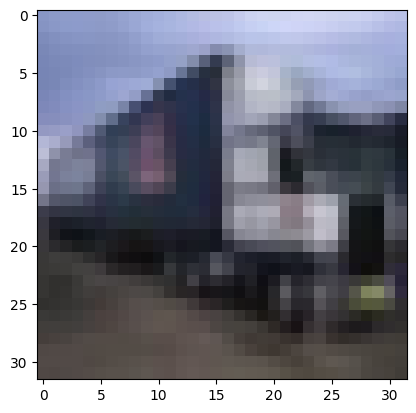

In [20]:
plt.imshow(img_array1)

Printout of all predictions of the image

In [21]:
# Get model predictions for the image
predictions = model.predict(img_array)
scores = predictions[0]

# Print out the scores for each class
for i, score in enumerate(scores):
    print(f"This image is {score * 100:.2f} percent {labels[i]}.")

# highlight the most likely class:
predicted_class = np.argmax(scores)
print(f"\nThe model is most confident about {labels[predicted_class]}, with a confidence of {scores[predicted_class] * 100:.2f} percent.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
This image is 0.00 percent airplane.
This image is 0.01 percent automobile.
This image is 0.00 percent bird.
This image is 0.00 percent cat.
This image is 0.00 percent deer.
This image is 0.00 percent dog.
This image is 0.00 percent frog.
This image is 0.01 percent horse.
This image is 0.00 percent ship.
This image is 99.98 percent truck.

The model is most confident about truck, with a confidence of 99.98 percent.


Model accuracy

In [22]:
loss, accuracy = model.evaluate(val_ds)
print(f"Model accuracy on the test set is: {accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.3672 - loss: 2.7470
Model accuracy on the test set is: 36.50%


# Q2 Deep Learning in Earth Science 


Consider the notebook [Bamboo_forest_detection.ipynb](https://colab.research.google.com/github/totti0223/deep_learning_for_biologists_with_keras/blob/master/notebooks/bamboo_forest_detection.ipynb) on using machine learning for detecting vegetation from satellite images

a) Adapt the code such that it runs in the `tfenv` environment. If necessary, install missing packages. Explain your modification in detail. (4 marks)

b) Thoroughly explain the code in this notebook by adding markdown cells starting with "# CA" (6 marks)